<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Datasets/submission.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data_train.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1657,5,83.60,404.2,Female,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
2086,52,19.35,1031.7,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
288,62,20.05,1263.9,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
3618,63,110.10,6705.7,Male,0,Yes,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
1974,2,19.85,35.9,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,1
5220,65,72.45,4653.85,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),1
623,56,59.80,3457.45,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),0
3961,16,69.10,1083.7,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,0
4965,19,86.85,1564.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
1724,59,81.25,4639.45,Female,0,Yes,No,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,Yes,Credit card (automatic),0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
data_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

проведем предобработку данных. а именно: удалим дупликаты, заполним пропуски и проверим на наличие шума в данных

видно, что в колонке "TotalSpent" тип данных "dtype", но должен "float". если подробно рассмотреть эти данные, то можно заметить, что пропускам в столбце 'TotalSpent' соотвествует 0 в столбце 'ClienPeriod', можно сделать предположение о том, что клиент не успел потратить деньги, а следовательно на место пропусков можно поставить 0

In [ ]:
data_train[data_train['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [ ]:
data_test[data_test['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [ ]:
print(f"Число пропусков в тренировачной части: {(data_train['TotalSpent'] == ' ').sum()}")
print(f"Число пропусков в тестовой части: {(data_test['TotalSpent'] == ' ').sum()}")

Число пропусков в тренировачной части: 9
Число пропусков в тестовой части: 2


In [ ]:
train_index = data_train[data_train['TotalSpent'] == ' '].index
test_index = data_test[data_test['TotalSpent'] == ' '].index

data_train.loc[train_index, 'TotalSpent'] = 0
data_test.loc[test_index, 'TotalSpent'] = 0

data_train['TotalSpent'] = data_train['TotalSpent'].astype(float)
data_test['TotalSpent'] = data_test['TotalSpent'].astype(float)

In [ ]:
print(f"Дупликаты на тренеровочной части данных: {data_train.drop(target_col, axis=1).duplicated(keep=False).sum()}")
print(f"Дупликаты на тестовой части данных: {data_test.duplicated(keep=False).sum()}")

Дупликаты на тренеровочной части данных: 41
Дупликаты на тестовой части данных: 6


In [ ]:
train_index = data_train[data_train.drop(target_col, axis=1).duplicated(keep=False)].index
test_index = data_test[data_test.duplicated(keep=False)].index

data_train = data_train.drop(index = train_index)
#data_test = data_test.drop(index = test_index)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

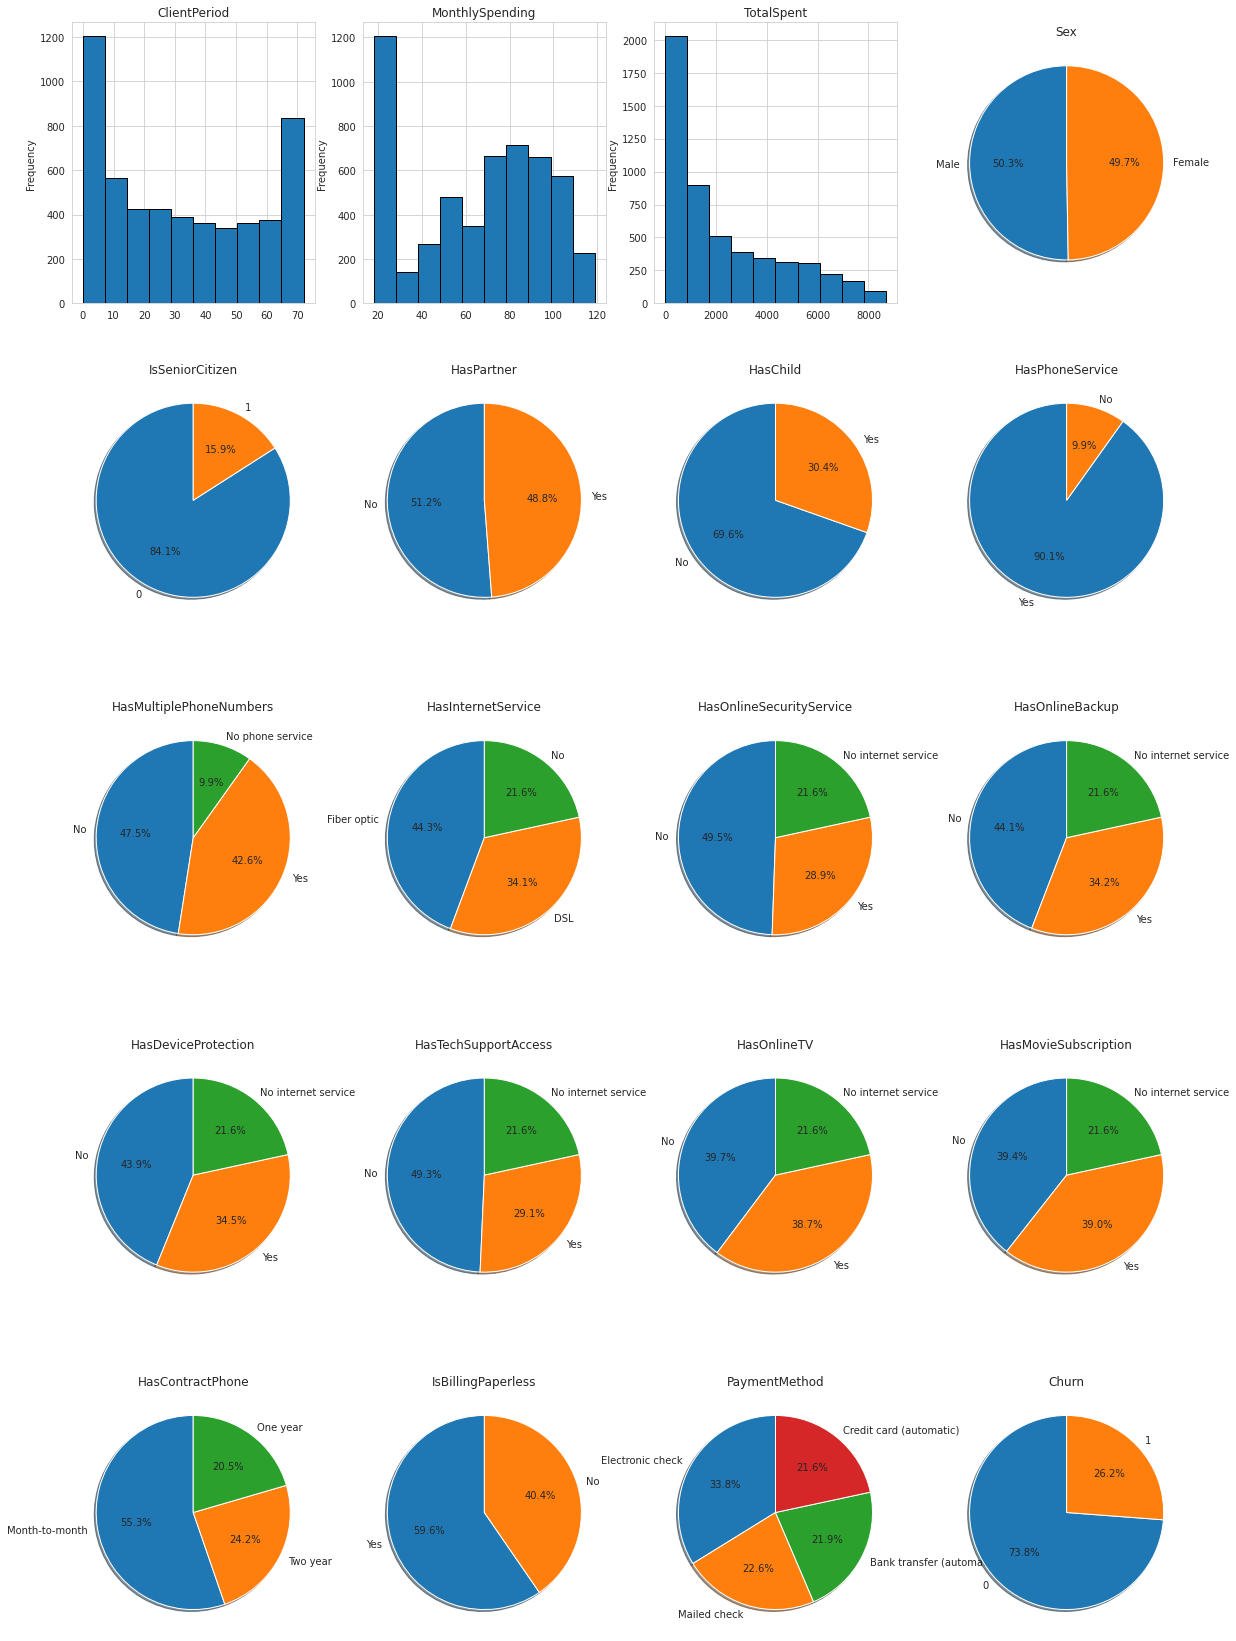

In [ ]:
import seaborn as sns


fig, axes = plt.subplots(5, 4, figsize=(20, 30))
for ax, col in zip(axes.flatten(), data_train.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(data_train[col].value_counts(), autopct="%1.1f%%", shadow = True, startangle = 90, labels=data_train[col].value_counts().index)
    else:
   
        data_train[col].plot(kind="hist", ec="black", ax=ax)
        

Блочная диаграмма также известна как диаграмма «коробка с усами» (boxplot) и используется для отображения распределения данных по разным квартилям. Это очень полезная визуализация на этапе исследовательского анализа данных, которая может помочь найти выбросы в данных.

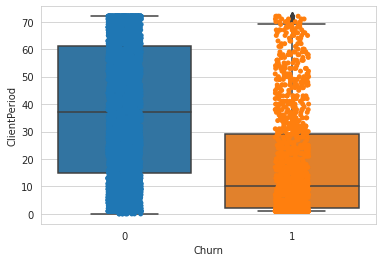

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(x=target_col,y= 'ClientPeriod',data=data_train)
sns.stripplot(x=target_col, y='ClientPeriod',data=data_train)

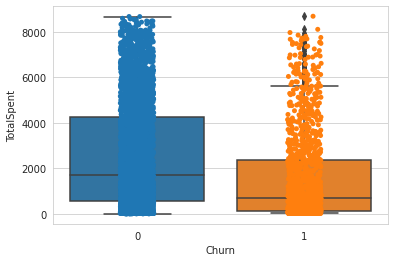

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(x=target_col,y= 'TotalSpent',data=data_train)
sns.stripplot(x=target_col, y='TotalSpent',data=data_train)

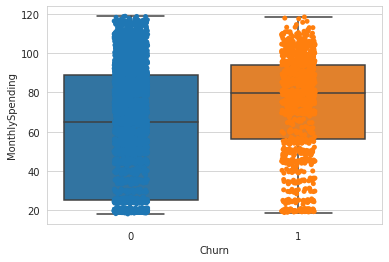

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(x=target_col,y= 'MonthlySpending',data=data_train)
sns.stripplot(x=target_col, y='MonthlySpending',data=data_train)

видно, что в данных есть выбросы

In [ ]:
data_train[target_col].value_counts()

0    3884
1    1357
Name: Churn, dtype: int64

классы несбалансированы. а значит необходимо использовать устойчивые к дисбалансу метрики качества, например F1-score

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [ ]:
X_train = data_train.drop(target_col, axis=1)
y_train = data_train[target_col]


для численных значений используем StandardScaler
категориальные разобьем с помощью OneHotEncoder

In [ ]:
prep_pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

создадим экземпляр модели с помощью make_pipeline
подбор параметров и кросс-валидацию проведем в GridSearchCV()

In [ ]:
clf  = make_pipeline(
    prep_pipeline,
    LogisticRegression(random_state=42, solver="liblinear", max_iter=10000)
    )

In [ ]:
param_grid = {
    'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__class_weight': ['balanced']
}

In [ ]:
model = GridSearchCV(clf, param_grid, cv=5, verbose=0, scoring='roc_auc', refit=True, n_jobs=-1)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
model.fit(X_train, y_train)

# смотрим лучше параметры
print("Best ROC-AUC metric:", round(model.best_score_,4))
print("Best estimator's parameters:", model.best_params_)

Best ROC-AUC metric: 0.8451
Best estimator's parameters: {'logisticregression__C': 10, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2'}


Best ROC-AUC metric: 0.8451
Best estimator's parameters: {'logisticregression__C': 10, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2'}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier, Pool

catboost_train_dataset = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_cols,
                  feature_names=feature_cols
                  )

In [ ]:

cb_clf = CatBoostClassifier(loss_function = 'CrossEntropy',
                                    random_state = 42,
                                    eval_metric = 'AUC', 
                                    bootstrap_type = 'Bayesian', # метод сэмплинга весов объектов
                                    verbose = False,
                                    early_stopping_rounds = 400,
                                    )

grid = {"iterations": [100, 200, 300, 500],
        "learning_rate":[0.01, 0.03, 0.05, 0.1],
        "max_depth": [2, 4, 6],
        "score_function": ['L2'],} 

cb_clf_grid_search = cb_clf.grid_search(grid, cv=5, X=catboost_train_dataset, shuffle=True, plot=True, train_size=0.8)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8174323884
bestIteration = 94

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8174324	best: 0.8174324 (0)	total: 535ms	remaining: 25.1s

bestTest = 0.8212749616
bestIteration = 95

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8212750	best: 0.8212750 (1)	total: 1.3s	remaining: 29.9s

bestTest = 0.8249802169
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8249802	best: 0.8249802 (2)	total: 1.87s	remaining: 28s

bestTest = 0.8262905553
bestIteration = 95

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8262906	best: 0.8262906 (3)	total: 2.35s	remaining: 25.9s

bestTest =

In [ ]:
cb_clf_grid_search['params']

{'depth': 2, 'iterations': 500, 'learning_rate': 0.1, 'score_function': 'L2'}

In [ ]:
y_train_predicted = cb_clf.predict_proba(X_train)[:, 1]
train_searching_auc = roc_auc_score(y_train, y_train_predicted)
train_searching_auc

0.8619338108006166

лучшая моделЬ показала результаты по метрике ROC-AUC = 0.8619

# Предсказания

In [ ]:
submission['Churn'] = cb_clf.predict_proba(data_test)[:, 1]
submission.to_csv('./my_submission.csv', index = False)

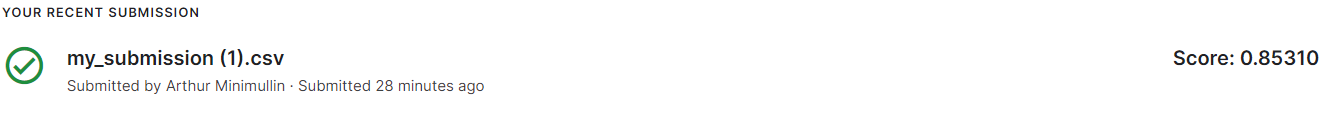